In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv('./data_BILI.csv',usecols=['Open','High','Close','Low','Volume'])
print(df)

       Open   High  Close      Low    Volume
0    12.070  12.42  12.16  11.5200   1529337
1    12.240  14.35  14.11  12.1600   3113438
2    13.830  14.87  13.55  13.0300   4410229
3    13.500  13.50  12.84  12.8000   2469385
4    12.940  13.18  12.75  12.6700   3480140
..      ...    ...    ...      ...       ...
979  30.285  33.78  32.19  29.4110  24037803
980  31.670  31.70  30.16  29.5500  10621747
981  29.970  30.44  30.02  28.5100  11280653
982  29.370  29.49  27.61  26.4600  12804962
983  27.020  27.66  25.71  25.6601  11724019

[984 rows x 5 columns]


In [3]:
X = df.iloc[:, 0:-1].values 
Y = df.iloc[:, -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [4]:
forest = RandomForestRegressor(n_estimators=1000,criterion='mse',random_state=1,n_jobs=-1)
forest.fit(X_train, Y_train)
Y_train_pred = forest.predict(X_train)
Y_test_pred = forest.predict(X_test)
print('MSE train: %f, test: %f' % (mean_squared_error(Y_train, Y_train_pred),mean_squared_error(Y_test, Y_test_pred)))
print('R^2 train: %f, test: %f' % (r2_score(Y_train, Y_train_pred),r2_score(Y_test, Y_test_pred)))

MSE train: 1393599456858.868896, test: 11105962717263.167969
R^2 train: 0.900400, test: 0.322954


In [5]:
importances = list(forest.feature_importances_)
print(importances)
feature_list = list(df.columns)[0:4]
feature_importances = [(feature, round(importance, 11)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
print(feature_importances)

[0.18080901282214468, 0.34855250161296414, 0.19160459088856896, 0.2790338946763223]
[('High', 0.34855250161), ('Low', 0.27903389468), ('Close', 0.19160459089), ('Open', 0.18080901282)]


[0, 1, 2, 3]


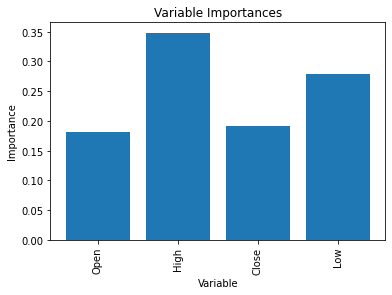

In [6]:
x_values = list(range(len(importances)))
print(x_values)
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list,rotation=90)
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
plt.show()